# CRIME DATA ANALYSIS WITH PYTHON AND MYSQL 

In [1]:
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### CONNECT TO MYSQL 

In [2]:
connection = pymysql.connect(host='localhost', 
        user='root', 
        password='12345678', 
        database='crime_data')                       #This code establishes a connection to a MySQL database hosted on the local machine.

In [3]:
df=pd.read_sql_query(""" Select * from crime_data """,connection)    #This line executes the SQL query (SELECT * FROM crime_data)
                                                                                    #on the connected database and reads the result into a pandas DataFrame (df)

C:\Users\HP\AppData\Local\Temp\ipykernel_1988\4158246026.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(""" Select * from crime_data """,connection)    #This line executes the SQL query (SELECT * FROM crime_data)


#### TO DISPLAY DATA SET OF CRIME_DATA 

In [4]:
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [5]:
df.columns            #it will retrive all the clm name

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

##### GETING INFORMATION LIKE TOTAL NO OF ROWS , COLUMNS AND MEMORY REQUIRED

In [6]:
df.info()      #TO summarize the datafram 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


##### GETING OVERALL STATISTIC ABOUT THE  DATAFRAME LIKE MIN MAX AVG ..... OF (NUMERICAL COLUMNS)

In [7]:
df.describe()  #descriptive analysis of numerical clm 

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


##### GETING OVERALL STATISTIC ABOUT THE  DATAFRAME LIKE MIN MAX AVG ..... (i.e OF NUMERICAL COLUMNS as well as the non numerical columns)

In [8]:
df.describe(include='all')

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
count,4.990000e+02,499,499,499,499.000000,499,499.000000,499,499,499,499,499.000000,499.000000
unique,NaN,68,61,19,NaN,42,NaN,4,67,4,365,NaN,NaN
top,NaN,01-11-2020,01-11-2020,Central,NaN,BURGLARY FROM VEHICLE,NaN,M,STREET,IC,800 N ALAMEDA ST,NaN,NaN
freq,NaN,42,38,423,NaN,82,NaN,278,105,447,14,NaN,NaN
mean,1.999930e+08,NaN,NaN,NaN,504.178357,NaN,32.142285,NaN,NaN,NaN,NaN,34.047335,-118.261283
std,8.742243e+06,NaN,NaN,NaN,198.381863,NaN,20.202136,NaN,NaN,NaN,NaN,0.053840,0.041560
min,1.030447e+07,NaN,NaN,NaN,210.000000,NaN,0.000000,NaN,NaN,NaN,NaN,33.710000,-118.560000
25%,2.001044e+08,NaN,NaN,NaN,330.000000,NaN,23.000000,NaN,NaN,NaN,NaN,34.040000,-118.260000
50%,2.001048e+08,NaN,NaN,NaN,442.000000,NaN,31.000000,NaN,NaN,NaN,NaN,34.050000,-118.250000
75%,2.001064e+08,NaN,NaN,NaN,624.000000,NaN,46.500000,NaN,NaN,NaN,NaN,34.050000,-118.240000


##### WHAT IS SHAPE OF DATASET

In [9]:
df.shape   

(499, 13)

##### check for null value

In [10]:
df.isnull().sum()


DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64

# QUESTIONS TO SOLVE:

# Spatial Analysis

In [ ]:
#SPATIAL ANALYSIS MAIN FOCUS TO ANALAYSIS geographic patterns, relationships, and trends

### Q1)Where are the geographical hotspots for reported crimes? 

In [11]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [12]:
df1=pd.read_sql_query(""" select LAT , LON ,count(*)as no_of_crime from Crime_data GROUP BY LAT,LON ORDER BY no_of_crime desc  """,connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_1988\3336947620.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1=pd.read_sql_query(""" select LAT , LON ,count(*)as no_of_crime from Crime_data GROUP BY LAT,LON ORDER BY no_of_crime desc  """,connection)


In [13]:
df1

,LAT,LON,no_of_crime
0,34.05,-118.26,95
1,34.05,-118.25,75
2,34.04,-118.25,47
3,34.06,-118.24,43
4,34.05,-118.24,39
...,...,...,...
76,34.07,-118.37,1
77,34.11,-118.24,1
78,34.08,-118.35,1
79,34.10,-118.30,1


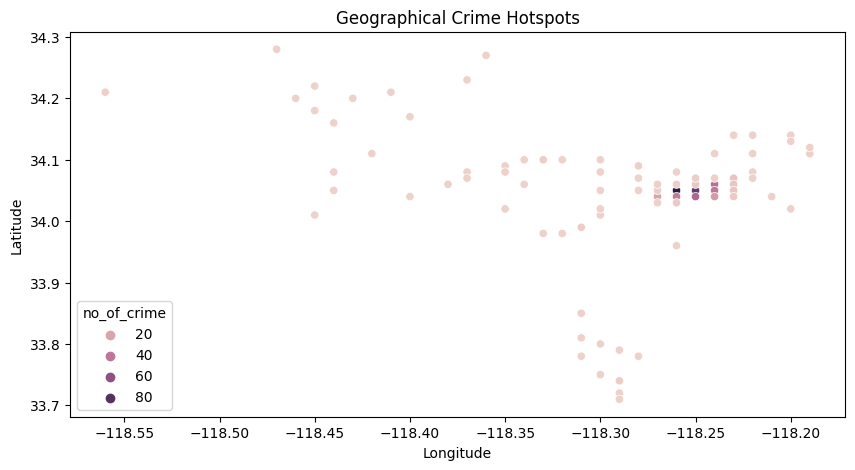

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='LON',y='LAT',data=df1,hue='no_of_crime')
plt.title('Geographical Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### conclusion : you can see the cluster where the most of crime happen [wE CAN Increase Police Presence,Enhance Security] TO REDUCE THE CRIME AT THAT LOCATION

# VICTIM DEMOGRAPHIC

### Q2) WHAT IS THE DISTRIBUTION OF VICTIMS AGES IN REPORTED CRIMES?

In [15]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [16]:
df2=pd.read_sql_query(""" SELECT Vict_Age, COUNT(*) AS Crime_Count FROM crime_data WHERE Vict_Age IS NOT NULL GROUP BY Vict_Age ORDER BY Crime_Count desc """,connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_1988\2878536085.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2=pd.read_sql_query(""" SELECT Vict_Age, COUNT(*) AS Crime_Count FROM crime_data WHERE Vict_Age IS NOT NULL GROUP BY Vict_Age ORDER BY Crime_Count desc """,connection)


In [17]:
df2


,Vict_Age,Crime_Count
0,0,90
1,26,19
2,35,17
3,28,16
4,23,15
...,...,...
61,8,1
62,9,1
63,17,1
64,70,1


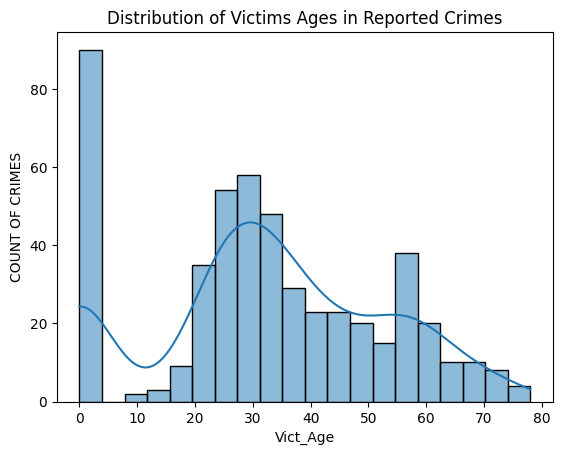

In [18]:
sns.histplot(df['Vict_Age'],bins=20,kde=True)
plt.title('Distribution of Victims Ages in Reported Crimes')
plt.xlabel('Vict_Age')
plt.ylabel('COUNT OF CRIMES')
plt.show()

##### conclusion : there are most of crimal whose age is not pecified AND MOST OF THE CRIME ARE DONE BY THE AGE BETWEEN 20 to 45

### Q3)IS there a significant diffrence in crime rates between male and female 

In [19]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [20]:
df9=df['Vict_Sex'].value_counts()          #it will count unique value 
df9

Vict_Sex
M    278
F    155
X     39
      27
Name: count, dtype: int64

In [21]:
df3=pd.read_sql_query(""" SELECT
    Vict_Sex,
    COUNT(*) AS TotalCrimes,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM crime_data WHERE Vict_Sex IN ('M', 'F')), 2) AS Percentage
FROM
    crime_data
WHERE
    Vict_Sex IN ('M', 'F')
GROUP BY
    Vict_Sex;
 """ ,connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_1988\1067995296.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3=pd.read_sql_query(""" SELECT


In [22]:
df3

,Vict_Sex,TotalCrimes,Percentage
0,F,155,35.8
1,M,278,64.2


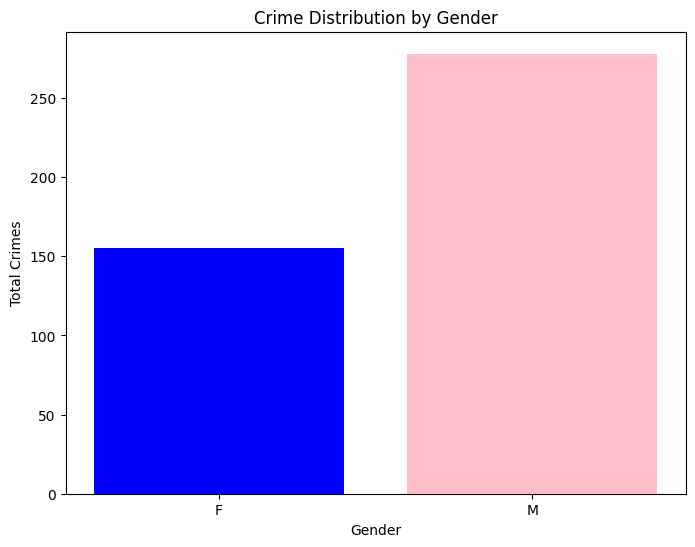

In [23]:
plt.figure(figsize=(8, 6))
plt.bar(df3['Vict_Sex'], df3['TotalCrimes'], color=['blue', 'pink'])
plt.title('Crime Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Crimes')
plt.show()


##### conclusion : MALE ARE COMMECTING THE CRIME TWICE THE FEMALE 

# LOCATION ANALYSIS

### Q4)where do most crime occured based on the "Location" clm?

In [24]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [25]:
df4 =pd.read_sql_query(""" Select Location ,count(*) as No_of_Crime_as_per_location from crime_data GROUP BY Location Order by No_of_Crime_as_per_location desc limit 4""", connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_1988\367456570.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 =pd.read_sql_query(""" Select Location ,count(*) as No_of_Crime_as_per_location from crime_data GROUP BY Location Order by No_of_Crime_as_per_location desc limit 4""", connection)


In [26]:
df4

,Location,No_of_Crime_as_per_location
0,800 N ALAMEDA ST,14
1,700 W 7TH ST,11
2,300 E 5TH ST,6
3,1100 S FIGUEROA ST,6


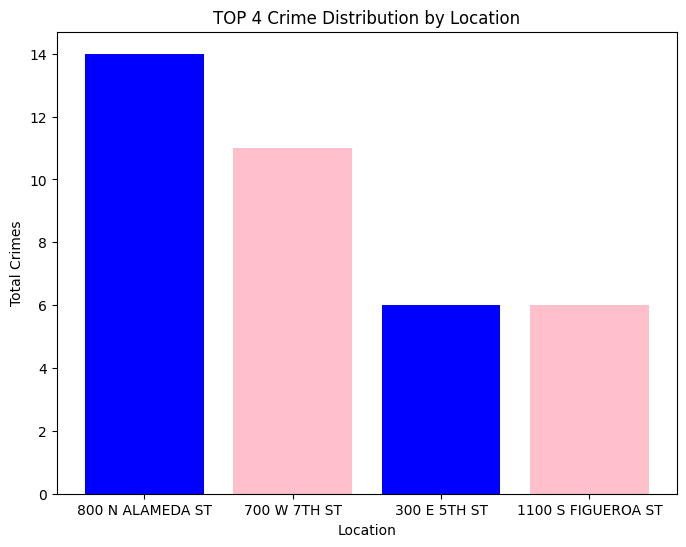

In [27]:
plt.figure(figsize=(8, 6))
plt.bar(df4['Location'], df4['No_of_Crime_as_per_location'], color=['blue', 'pink'])
plt.title('TOP 4 Crime Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Total Crimes')
plt.show()



##### CONCLUSION : MOST OF THE CRIME ARE COMMITED AT LOCATION AS SHOWN IN BAR CHART 

# CRIME CODE ANALYSIS

### Q5) WHAT IS THE DISTRIBUTION OF REPORTED CRIME BASED ON CRIME CODE?

In [28]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [29]:
df5=pd.read_sql_query(""" Select Crm_Cd,count(*) as No_of_Crimes_AS_PER_CRIMECODE 
FROM crime_data Group by Crm_cd order by No_of_Crimes_AS_PER_CRIMECODE desc """, connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_1988\1151101989.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5=pd.read_sql_query(""" Select Crm_Cd,count(*) as No_of_Crimes_AS_PER_CRIMECODE


In [30]:
df5

,Crm_Cd,No_of_Crimes_AS_PER_CRIMECODE
0,330,82
1,624,74
2,440,44
3,442,28
4,510,28
5,341,26
6,230,24
7,745,23
8,740,23
9,888,19


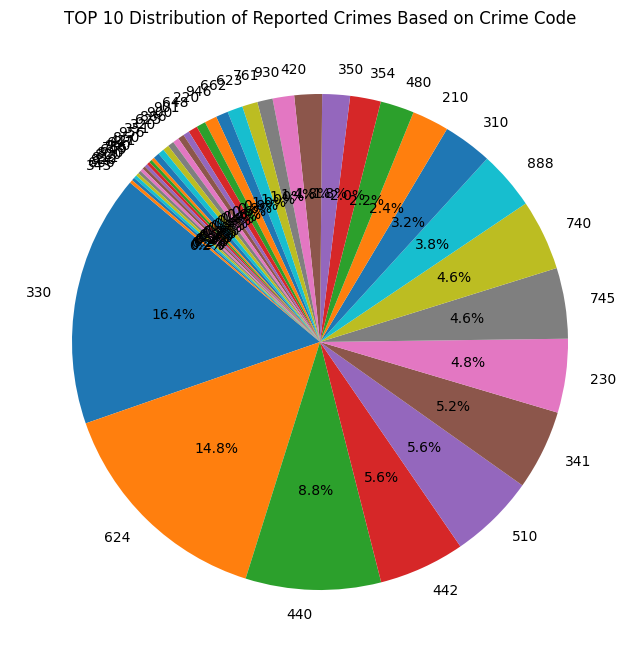

In [31]:
# Plotting a pie chart
plt.figure(figsize=(8, 10))
plt.pie(df5['No_of_Crimes_AS_PER_CRIMECODE'], labels=df5['Crm_Cd'], autopct='%1.1f%%', startangle=140)
plt.title('TOP 10 Distribution of Reported Crimes Based on Crime Code')
plt.show()

##### CONCLUSION : top 4 crime code i.e(330,624,440,442,510)commited 51.2% of crime  

## TEMPORAL ANALYSIS TO ANALYSIZE THE DATA OVER TIME/TIME RELATED ANALYSIS 

In [32]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [33]:
df6=pd.read_sql_query("""select Date_Rptd,count(*) as count_crime from crime_data group by Date_Rptd order by count_crime desc""",connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_1988\3816163954.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6=pd.read_sql_query("""select Date_Rptd,count(*) as count_crime from crime_data group by Date_Rptd order by count_crime desc""",connection)


In [34]:
df6


,Date_Rptd,count_crime
0,01-11-2020,42
1,01-12-2020,34
2,02-02-2020,31
3,01-02-2020,30
4,01-08-2020,27
...,...,...
63,09-08-2020,1
64,02-12-2020,1
65,11-04-2020,1
66,01-08-2021,1


In [35]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [37]:
df7=pd.read_sql_query("""select DATE_OCC,count(*) as count_crime from crime_data group by DATE_OCC order by count_crime desc""",connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_1988\1888304313.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7=pd.read_sql_query("""select DATE_OCC,count(*) as count_crime from crime_data group by DATE_OCC order by count_crime desc""",connection)


In [38]:
df7

,DATE_OCC,count_crime
0,01-11-2020,38
1,02-01-2020,35
2,01-01-2020,34
3,01-06-2020,33
4,01-04-2020,29
...,...,...
56,09-04-2020,1
57,11-04-2020,1
58,09-08-2020,1
59,02-10-2020,1


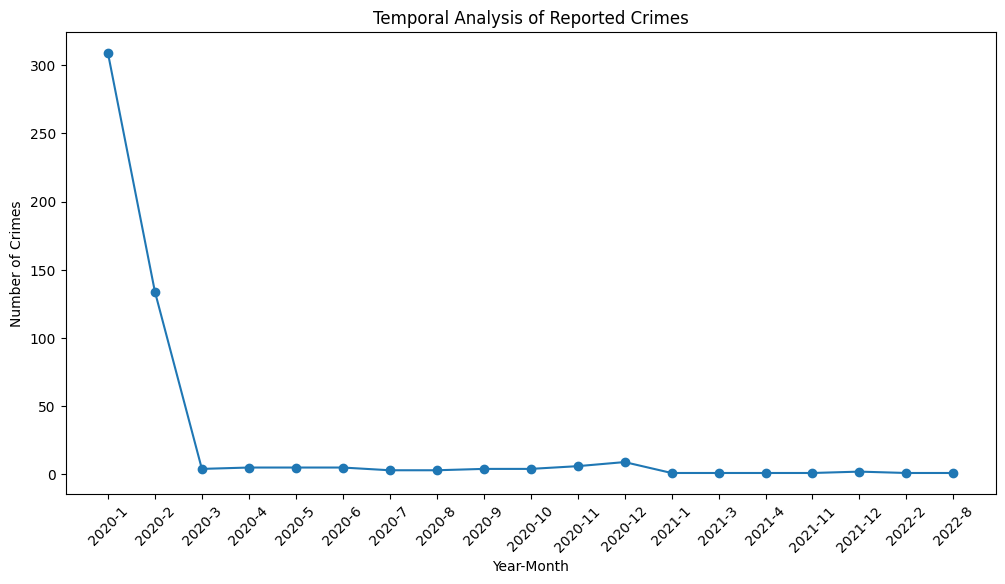

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Convert 'Date_Rptd' column to datetime format
df['Date_Rptd'] = pd.to_datetime(df['Date_Rptd'])

# Extract year and month from the 'Date_Rptd' column
df['Year'] = df['Date_Rptd'].dt.year
df['Month'] = df['Date_Rptd'].dt.month

# Count the number of crimes for each month
temporal_analysis = df.groupby(['Year', 'Month']).size().reset_index(name='Crime_Count')

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the temporal analysis
plt.plot(temporal_analysis['Year'].astype(str) + '-' + temporal_analysis['Month'].astype(str), temporal_analysis['Crime_Count'], marker='o')

# Set title and labels
plt.title('Temporal Analysis of Reported Crimes')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


#### CONCLUSION : MOST OF THE CRIME REPORTED ON STARTING THREE MONTH

# END